In [75]:
# import the necessary packages
import numpy as np
import cv2
from matplotlib import pyplot as plt
import imutils

In [76]:
from os import listdir
from os.path import isfile, join
images_paths = sorted([f for f in listdir('../images') if isfile(join('../images', f))])

In [77]:
def bound_box(image_path):
    # load the image and convert it to grayscale
    image = cv2.imread(image_path)
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    """print(image.shape)
    plt.imshow(gray, 'gray')"""

    # Find contours
    kernel_horizontal_derivative = 1/4 * np.array([[-1,0,1], [-2,0,2], [-1,0,1]])
    image_horizontal_derivative = cv2.filter2D(gray, -1, kernel_horizontal_derivative)
    image_horizontal_derivative = np.abs(image_horizontal_derivative)
    kernel_vertical_derivative = 1/4 * np.array([[-1,-2,-1], [0,0,0], [1,2,1]])
    image_vertical_derivative = cv2.filter2D(gray, -1, kernel_vertical_derivative)
    image_vertical_derivative = np.abs(image_vertical_derivative)

    image_derivative = np.maximum(image_horizontal_derivative, image_vertical_derivative)

    """plt.figure()
    plt.imshow(image_horizontal_derivative, 'gray')"""
    
    ret2,thresh = cv2.threshold(image_horizontal_derivative,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (20, 20))
    closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1, 100))
    opened = cv2.morphologyEx(closed, cv2.MORPH_OPEN, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (50, 1))
    closed1 = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (20, 1))
    opened1 = cv2.morphologyEx(closed1, cv2.MORPH_OPEN, kernel)
    
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (11, 1))
    dilated = cv2.dilate(opened1, kernel, iterations=5)
    
    cnts = cv2.findContours(dilated.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #print(cnts)
    cnts = imutils.grab_contours(cnts)
    c = sorted(cnts, key = cv2.contourArea, reverse = True)[0]
    # compute the rotated bounding box of the largest contour
    rect = cv2.minAreaRect(c)
    #print(rect)
    box = cv2.cv.BoxPoints(rect) if imutils.is_cv2() else cv2.boxPoints(rect)
    box = np.int0(box)
    #print(box)
    # draw a bounding box arounded the detected barcode and display the
    # image
    image_bb = image.copy()
    cv2.drawContours(image_bb, [box], -1, (0, 255, 0), 3)
    plt.figure()
    plt.imshow(image_bb, 'gray')
    
    coordinates_source = box.astype('float32')
    min_width = coordinates_source[:,0].min()
    min_height = coordinates_source[:,1].min()
    max_width = coordinates_source[:,0].max()
    max_height = coordinates_source[:,1].max()
    def normalize(value, axis=0):
        if axis==0:  # Horizontal dimension
            return min_width if (value-min_width<max_width-value) \
                             else max_width
        elif axis==1:  # Vertical dimension
            return min_height if (value-min_height<max_height-value) \
                              else max_height
    coordinates_source = np.array(sorted([tuple(v) for v in coordinates_source], key=lambda t: (normalize(t[1], axis=1),
                                                                                                normalize(t[0], axis=0))))
    print(coordinates_source)
    def dist(point1, point2):
        return np.sqrt(np.sum((point1-point2)**2))
    destination_height = int(max([dist(coordinates_source[0],coordinates_source[2]),
                             dist(coordinates_source[1],coordinates_source[3])]))
    destination_width = int(max([dist(coordinates_source[0],coordinates_source[1]),
                             dist(coordinates_source[2],coordinates_source[3])]))
    coordinates_destination = np.array([[0, 0],
                                        [destination_width-1, 0],
                                        [0, destination_height-1],
                                        [destination_width-1, destination_height-1]], dtype='float32')
    # Computing the trasformation, i.e. homography. Warping.
    H = cv2.getPerspectiveTransform(coordinates_source, coordinates_destination)
    # Applying the trasformation
    gray1 = cv2.warpPerspective(gray, H, (destination_width, destination_height))
    plt.figure()
    plt.imshow(gray1, 'gray')

[[ 405.  261.]
 [1300.  257.]
 [ 408. 1053.]
 [1304. 1049.]]
Wall time: 304 ms


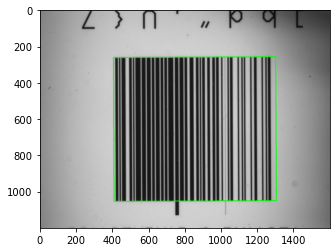

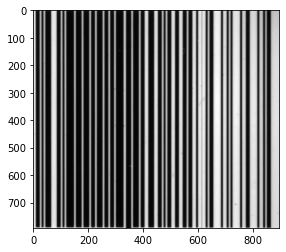

In [78]:
%%time
bound_box(f'../images/{images_paths[0]}')

[[ 353.  288.]
 [1253.  288.]
 [ 353. 1084.]
 [1253. 1084.]]
Wall time: 267 ms


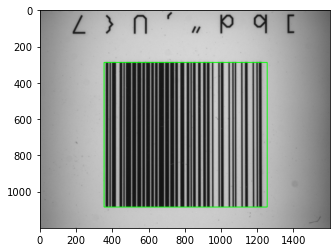

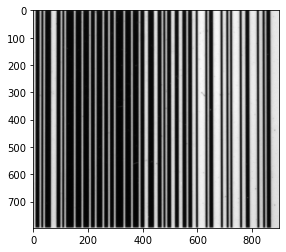

In [79]:
%%time
bound_box(f'../images/{images_paths[1]}')

[[ 202.  241.]
 [1048.  237.]
 [ 205.  723.]
 [1051.  718.]]
Wall time: 210 ms


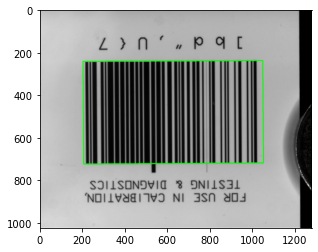

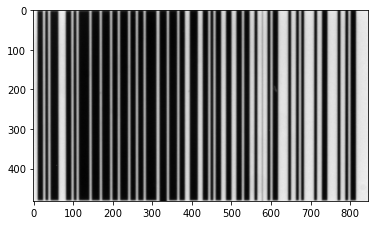

In [80]:
%%time
bound_box(f'../images/{images_paths[2]}')

[[132. 258.]
 [978. 258.]
 [132. 740.]
 [978. 740.]]
Wall time: 222 ms


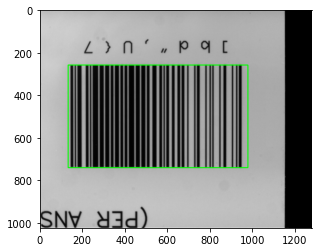

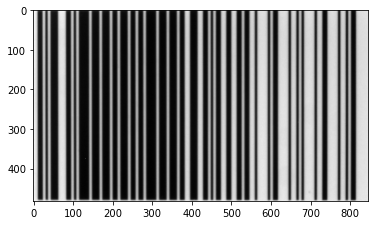

In [81]:
%%time
bound_box(f'../images/{images_paths[3]}')

[[330. 172.]
 [910. 172.]
 [330. 685.]
 [910. 685.]]
Wall time: 160 ms


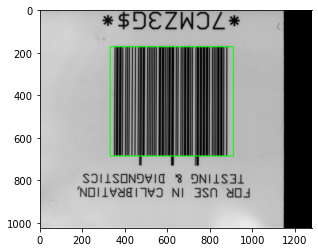

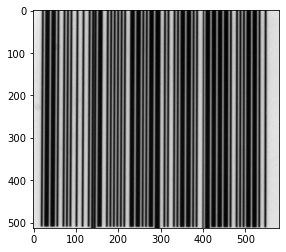

In [82]:
%%time
bound_box(f'../images/{images_paths[4]}')

[[336. 251.]
 [919. 251.]
 [336. 764.]
 [919. 764.]]


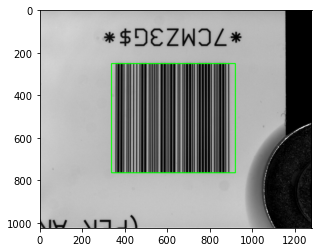

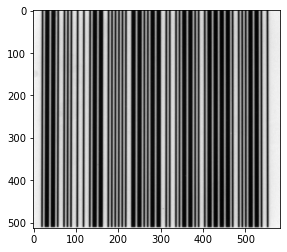

In [83]:
bound_box(f'../images/{images_paths[5]}')

[[ 162.  287.]
 [1109.  287.]
 [ 162.  846.]
 [1109.  846.]]


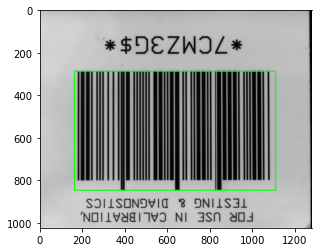

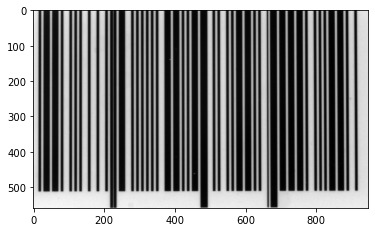

In [84]:
bound_box(f'../images/{images_paths[6]}')

[[ 147.  274.]
 [1099.  276.]
 [ 146.  787.]
 [1098.  789.]]


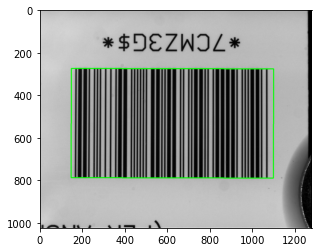

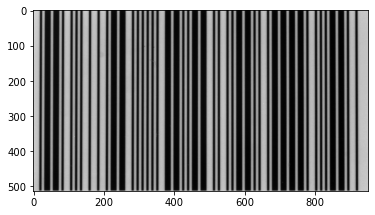

In [85]:
bound_box(f'../images/{images_paths[7]}')

[[ 147.  274.]
 [1099.  276.]
 [ 146.  787.]
 [1098.  789.]]


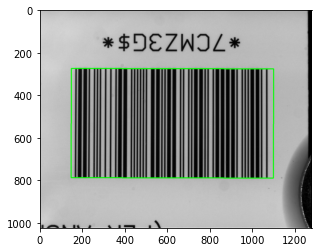

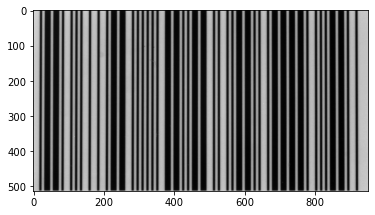

In [86]:
bound_box(f'../images/{images_paths[7]}')

[[327. 335.]
 [982. 340.]
 [323. 778.]
 [978. 784.]]


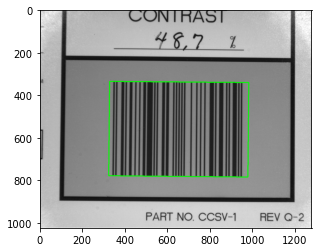

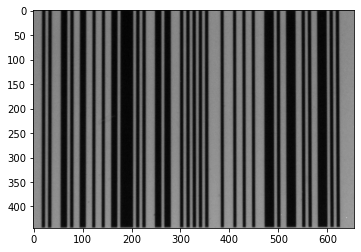

In [87]:
bound_box(f'../images/{images_paths[8]}')

[[339. 255.]
 [988. 264.]
 [333. 719.]
 [982. 728.]]


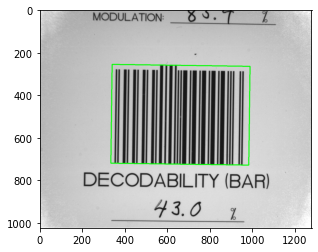

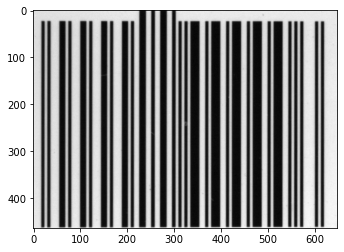

In [88]:
bound_box(f'../images/{images_paths[9]}')

In [89]:
print(f'../images/{images_paths[10]}')

images/EAN-UPC-DEFECTS IMGB.BMP


In [90]:
#bound_box(f'../images/{images_paths[10]}')

[[263. 308.]
 [962. 305.]
 [265. 756.]
 [964. 753.]]


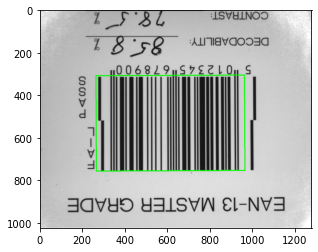

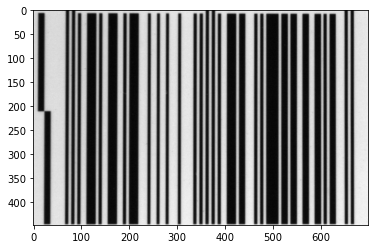

In [91]:
bound_box(f'../images/{images_paths[11]}')

In [92]:
#bound_box(f'../images/{images_paths[12]}')

[[ 101.  118.]
 [1303.  120.]
 [ 100.  310.]
 [1302.  312.]]


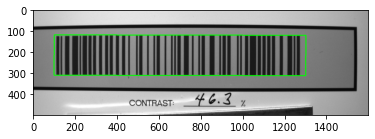

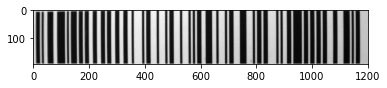

In [93]:
bound_box(f'../images/{images_paths[13]}')

[[ 165.  146.]
 [1360.  146.]
 [ 165.  336.]
 [1360.  336.]]


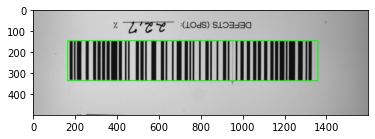

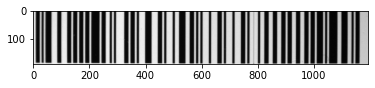

In [94]:
bound_box(f'../images/{images_paths[14]}')

[[ 165.  146.]
 [1360.  146.]
 [ 165.  336.]
 [1360.  336.]]


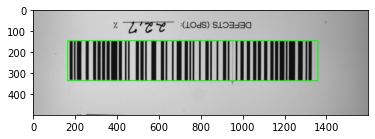

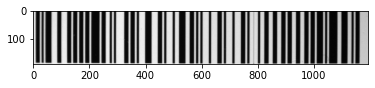

In [95]:
bound_box(f'../images/{images_paths[14]}')

[[ 180.  167.]
 [1393.  156.]
 [ 182.  360.]
 [1395.  349.]]


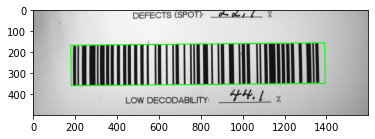

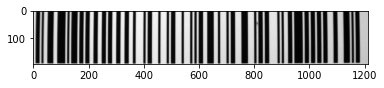

In [96]:
bound_box(f'../images/{images_paths[15]}')

[[ 180.  167.]
 [1393.  156.]
 [ 182.  360.]
 [1395.  349.]]


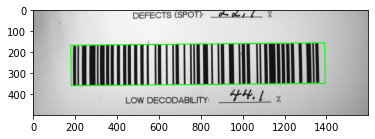

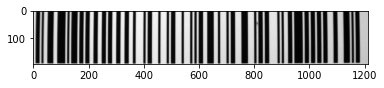

In [97]:
bound_box(f'../images/{images_paths[15]}')

[[ 180.  167.]
 [1393.  156.]
 [ 182.  360.]
 [1395.  349.]]


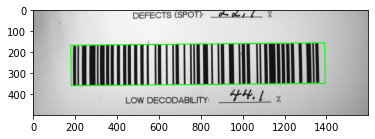

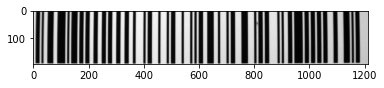

In [98]:
bound_box(f'../images/{images_paths[15]}')

[[ 180.  167.]
 [1393.  156.]
 [ 182.  360.]
 [1395.  349.]]


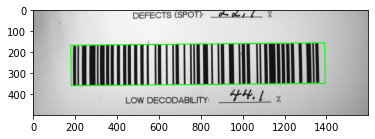

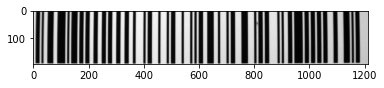

In [99]:
bound_box(f'../images/{images_paths[15]}')

[[ 203.  141.]
 [1400.  141.]
 [ 203.  331.]
 [1400.  331.]]


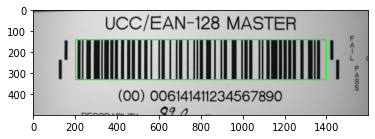

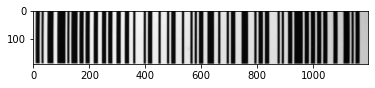

In [100]:
bound_box(f'../images/{images_paths[16]}')

[[ 194.  146.]
 [1360.  127.]
 [ 198.  384.]
 [1364.  365.]]


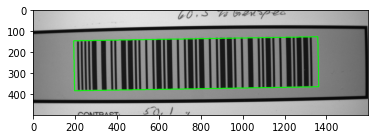

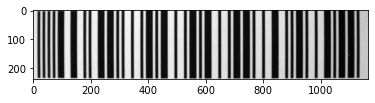

In [101]:
bound_box(f'../images/{images_paths[17]}')

[[ 196.  129.]
 [1366.  118.]
 [ 198.  369.]
 [1368.  358.]]


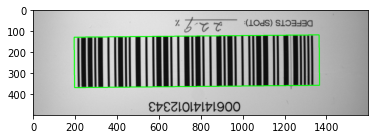

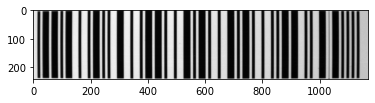

In [102]:
bound_box(f'../images/{images_paths[18]}')

[[ 229.   59.]
 [1394.   59.]
 [ 229.  297.]
 [1394.  297.]]


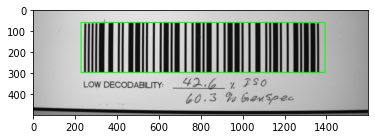

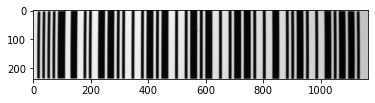

In [103]:
bound_box(f'../images/{images_paths[19]}')

[[ 247.  141.]
 [1416.  131.]
 [ 249.  381.]
 [1418.  371.]]


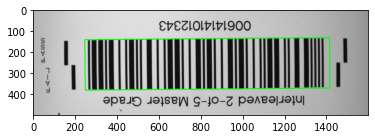

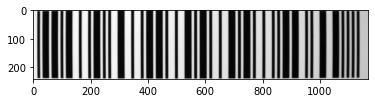

In [104]:
bound_box(f'../images/{images_paths[20]}')

In [105]:
print(f'../images/{images_paths[21]}')

images/TestChart.xls


In [106]:
#bound_box(f'../images/{images_paths[21]}')

[[192. 213.]
 [886. 209.]
 [194. 642.]
 [888. 638.]]


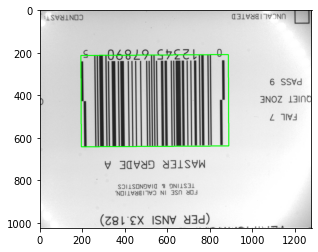

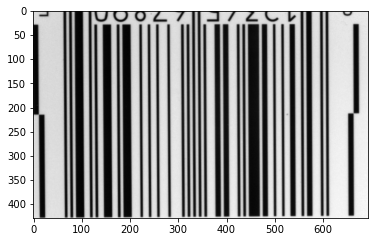

In [107]:
bound_box(f'../images/{images_paths[22]}')

[[309. 307.]
 [905. 312.]
 [306. 735.]
 [901. 740.]]


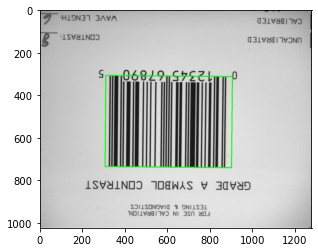

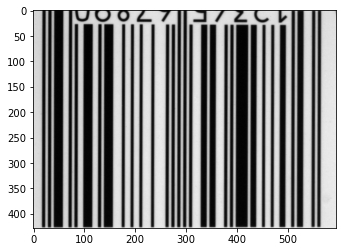

In [108]:
bound_box(f'../images/{images_paths[23]}')

[[343. 302.]
 [936. 312.]
 [336. 731.]
 [929. 741.]]


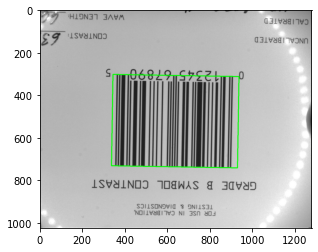

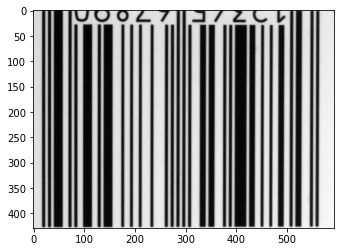

In [109]:
bound_box(f'../images/{images_paths[24]}')

[[350. 305.]
 [944. 307.]
 [348. 733.]
 [943. 736.]]


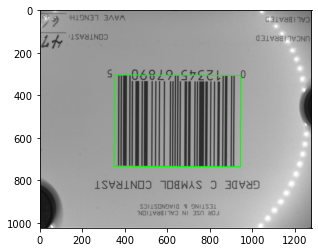

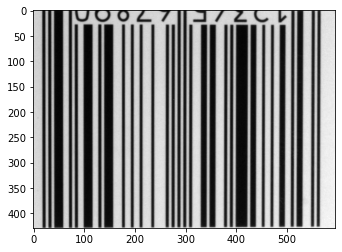

In [110]:
bound_box(f'../images/{images_paths[25]}')

[[291. 280.]
 [884. 301.]
 [275. 710.]
 [868. 731.]]


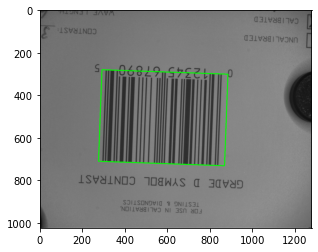

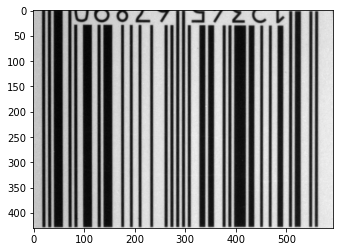

In [111]:
bound_box(f'../images/{images_paths[26]}')

[[327. 292.]
 [920. 302.]
 [319. 721.]
 [913. 731.]]


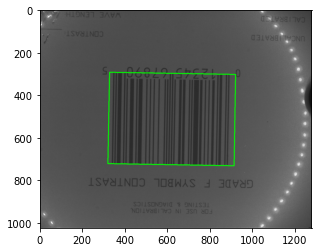

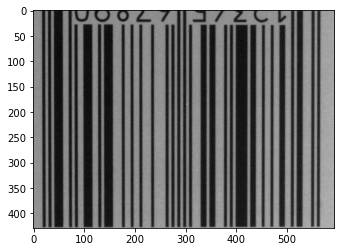

In [112]:
bound_box(f'../images/{images_paths[27]}')

[[321. 296.]
 [916. 304.]
 [316. 726.]
 [911. 733.]]


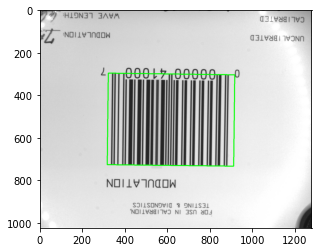

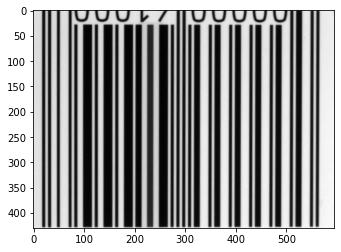

In [113]:
bound_box(f'../images/{images_paths[28]}')

[[321. 301.]
 [916. 310.]
 [314. 731.]
 [909. 741.]]


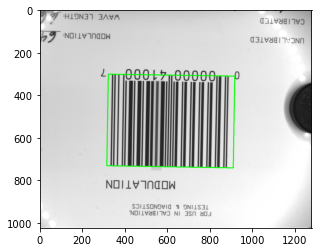

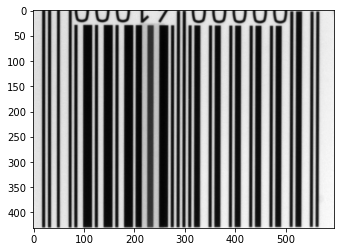

In [114]:
bound_box(f'../images/{images_paths[29]}')

[[318. 311.]
 [913. 323.]
 [310. 742.]
 [905. 753.]]


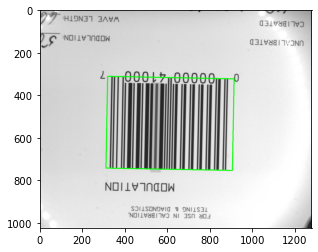

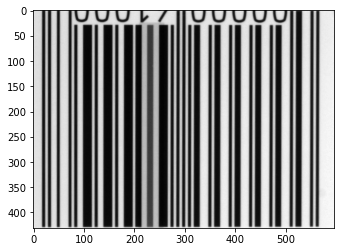

In [115]:
bound_box(f'../images/{images_paths[30]}')

[[326. 300.]
 [920. 316.]
 [314. 730.]
 [908. 747.]]


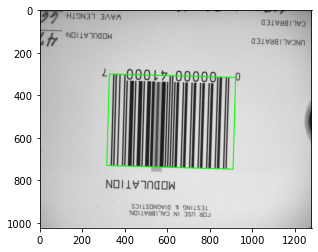

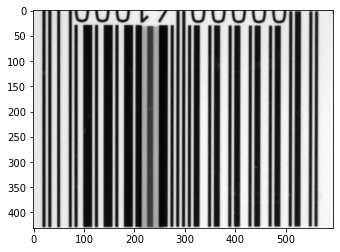

In [116]:
bound_box(f'../images/{images_paths[31]}')

[[328. 293.]
 [922. 293.]
 [328. 722.]
 [922. 722.]]


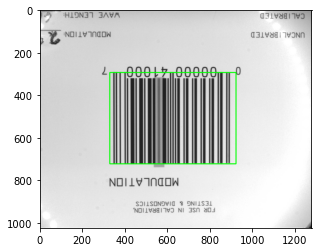

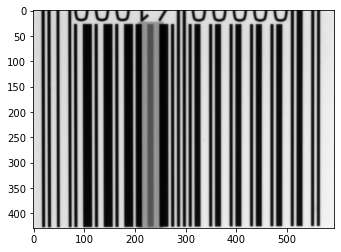

In [117]:
bound_box(f'../images/{images_paths[32]}')

[[339. 299.]
 [934. 305.]
 [335. 749.]
 [929. 755.]]


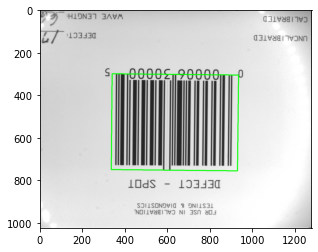

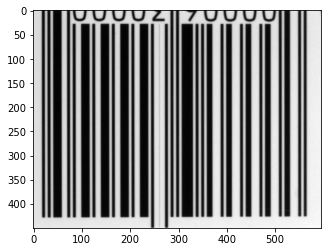

In [118]:
bound_box(f'../images/{images_paths[34]}')

[[339. 289.]
 [933. 298.]
 [332. 739.]
 [927. 748.]]


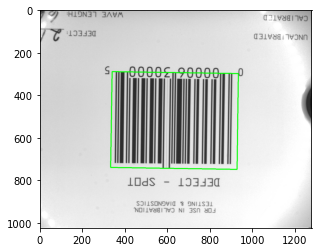

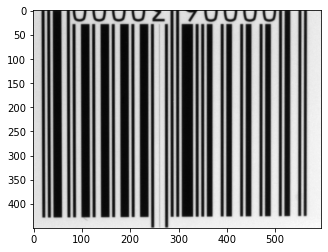

In [119]:
bound_box(f'../images/{images_paths[35]}')

[[327. 295.]
 [920. 295.]
 [327. 744.]
 [920. 744.]]


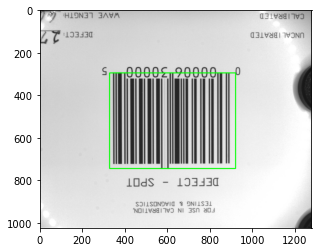

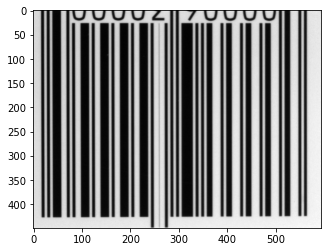

In [120]:
bound_box(f'../images/{images_paths[36]}')

[[313. 300.]
 [907. 301.]
 [313. 751.]
 [907. 751.]]


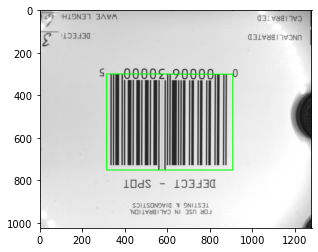

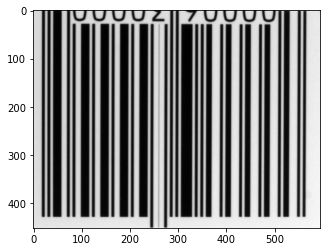

In [121]:
bound_box(f'../images/{images_paths[37]}')

[[325. 302.]
 [921. 302.]
 [325. 731.]
 [921. 731.]]


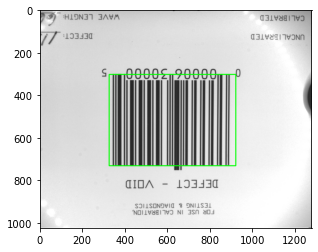

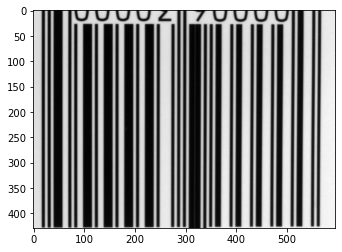

In [122]:
bound_box(f'../images/{images_paths[38]}')

[[329. 294.]
 [924. 299.]
 [325. 723.]
 [920. 729.]]


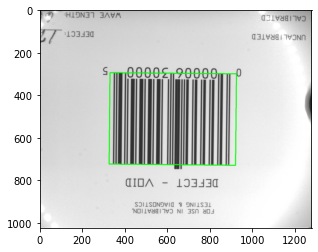

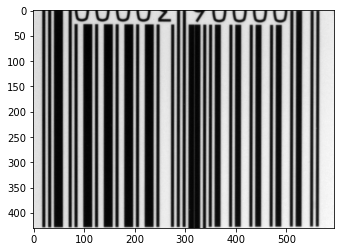

In [123]:
bound_box(f'../images/{images_paths[39]}')

[[293. 303.]
 [888. 305.]
 [292. 732.]
 [887. 734.]]


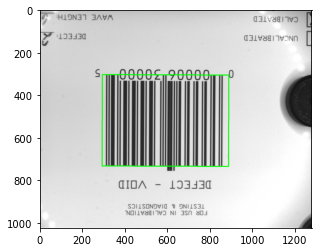

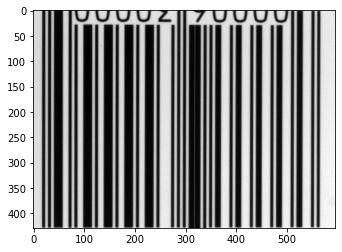

In [124]:
bound_box(f'../images/{images_paths[40]}')

[[283. 297.]
 [878. 294.]
 [285. 737.]
 [880. 735.]]


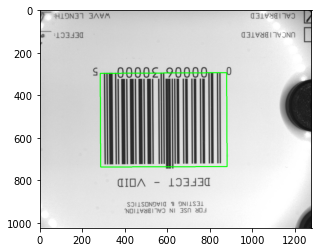

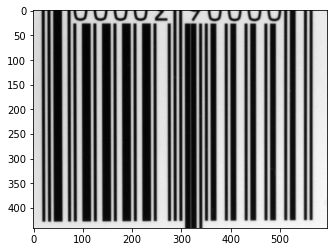

In [125]:
bound_box(f'../images/{images_paths[41]}')

[[281. 294.]
 [876. 294.]
 [281. 735.]
 [876. 735.]]


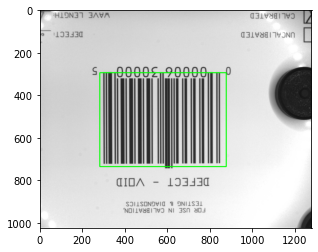

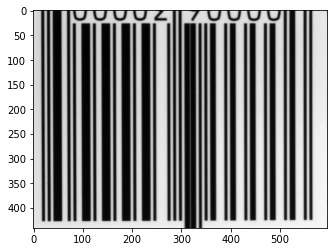

In [126]:
bound_box(f'../images/{images_paths[42]}')

[[275. 289.]
 [870. 289.]
 [275. 718.]
 [870. 718.]]


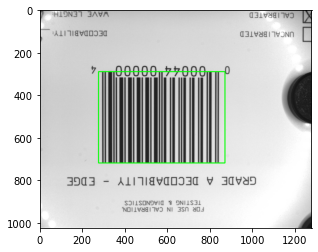

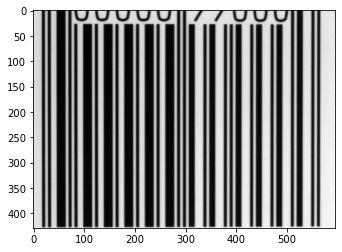

In [127]:
bound_box(f'../images/{images_paths[43]}')

[[275. 289.]
 [870. 289.]
 [275. 718.]
 [870. 718.]]


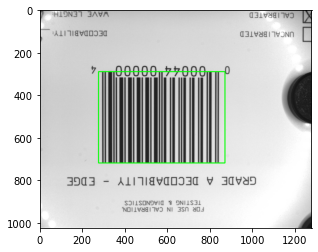

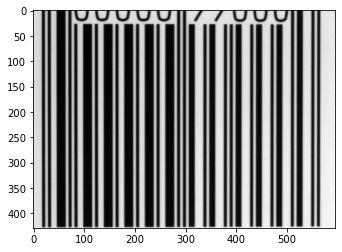

In [128]:
bound_box(f'../images/{images_paths[43]}')

[[285. 294.]
 [880. 297.]
 [282. 724.]
 [878. 727.]]


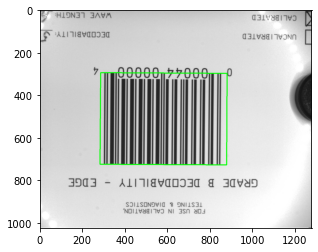

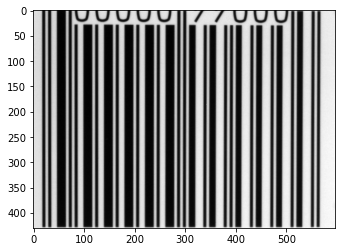

In [129]:
bound_box(f'../images/{images_paths[44]}')

[[274. 306.]
 [869. 309.]
 [272. 736.]
 [867. 739.]]


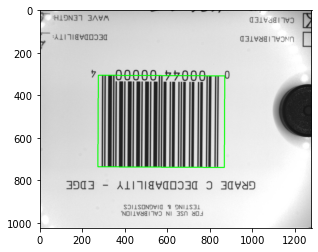

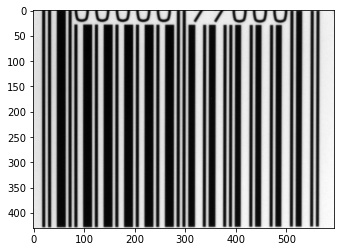

In [130]:
bound_box(f'../images/{images_paths[45]}')

[[258. 295.]
 [854. 303.]
 [252. 725.]
 [848. 733.]]


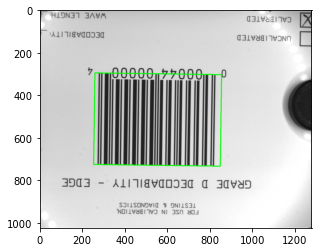

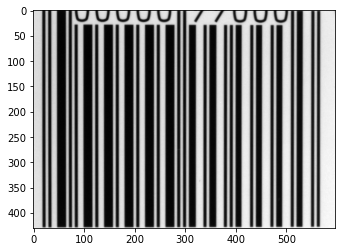

In [131]:
bound_box(f'../images/{images_paths[46]}')

[[252. 303.]
 [849. 307.]
 [249. 733.]
 [845. 738.]]


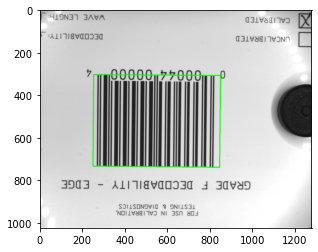

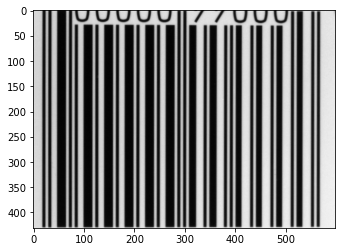

In [132]:
bound_box(f'../images/{images_paths[47]}')

[[247. 301.]
 [843. 308.]
 [241. 732.]
 [838. 739.]]


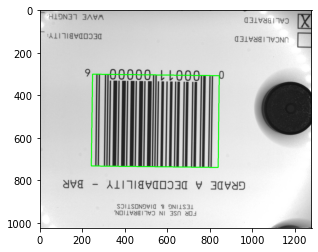

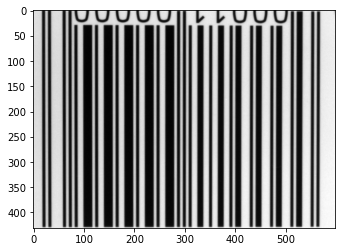

In [133]:
bound_box(f'../images/{images_paths[48]}')

[[251. 302.]
 [847. 309.]
 [245. 733.]
 [842. 740.]]


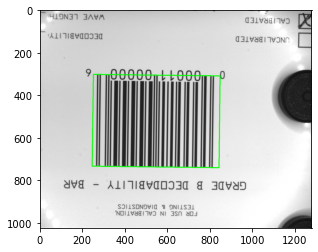

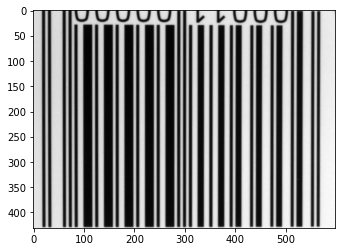

In [134]:
bound_box(f'../images/{images_paths[49]}')

[[275. 280.]
 [871. 288.]
 [270. 710.]
 [865. 717.]]


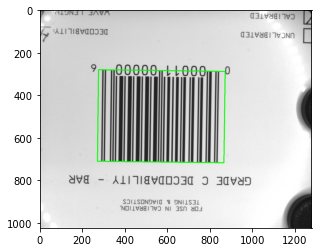

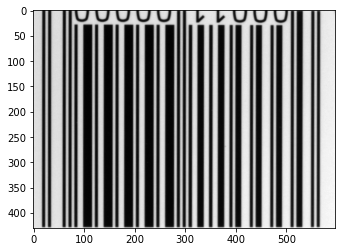

In [135]:
bound_box(f'../images/{images_paths[50]}')

[[277. 289.]
 [873. 297.]
 [271. 720.]
 [867. 728.]]


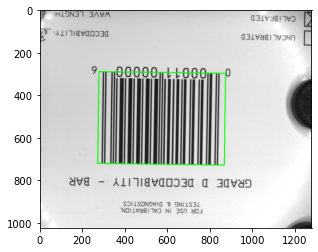

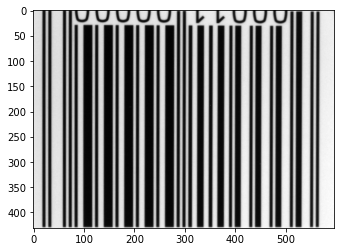

In [136]:
bound_box(f'../images/{images_paths[51]}')

[[290. 293.]
 [885. 294.]
 [290. 722.]
 [885. 722.]]


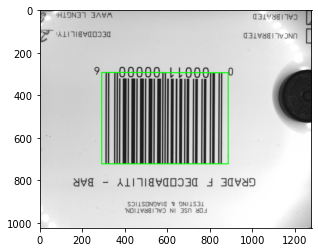

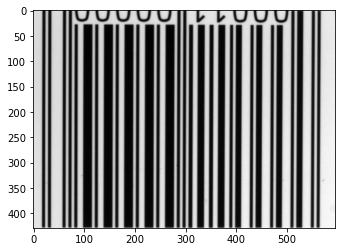

In [137]:
bound_box(f'../images/{images_paths[52]}')

In [138]:
%%time
bound_box('other images/1.png')

IndexError: list index out of range